# 📊 **단기 추세 및 거래량 분석 프로젝트 계획서**

---

## 🌟 **1. 프로젝트 개요**

이 프로젝트는 주가 데이터셋을 기반으로 **래리 윌리엄스의 단기 추세 변곡점 분석법**을 활용하여,  
📈 **추세를 식별**하고,  
📊 **거래량 및 평균 거래량 비율**을 통해 주식의 상방 혹은 하방을 분석 및 예측하는 것을 목표로 합니다.

---

## 🗂 **2. 데이터셋 정보**

### 🛠️ **원본 데이터셋 (야후 파이낸스에서 수집)**  
- 📌 **종목명**  
- 📅 **날짜**  
- 🔄 **등락률**  
- 💵 **종가**  
- 📈 **고가**  
- 📉 **저가**  
- 📊 **거래량**  

---

## 📄 **3. 전처리 후 최종 데이터셋**

| 컬럼명                      | 설명                                                           |
|-----------------------------|----------------------------------------------------------------|
| **📌 종목명**                | 종목 코드 (확인용)                                            |
| **📅 날짜**                  | 거래가 발생한 날짜 (확인용)                                    |
| **🔄 등락률(*)**             | 해당 날짜의 등락률 (%)                                         |
| **📊 거래량**                | 해당 날짜의 거래량                                             |
| **📈 단기 추세**             | 상승 혹은 하락 (래리 윌리엄스 변곡점 투자법 적용)              |
| **📊 단기 추세 거래량 비율** | 현재 추세의 누적 거래량 / 이전 추세의 누적 거래량               |
| **📉 단기 추세 누적 거래량** | 현재 단기 추세에 누적된 거래량 합계                            |
| **📈 거래량 / 평균 20일 거래량** | 거래량 / 최근 20일간의 평균 거래량 (거래량 발생 확인용)         |
| **🗓️ 요일**                 | 해당 날짜의 요일 정보 (등락률과 요일의 관계 확인용)             |

---

## 🔍 **4. 프로젝트 진행 과정**

### **1️⃣ 데이터 수집**
- **미국 S&P 500** 지수의 데이터를 `yfinance` 라이브러리를 통해 매일 장 마감 후 자동 수집.  
- 주요 데이터: 📌 종목명, 📅 날짜, 📈 고가, 📉 저가, 💵 종가, 📊 거래량, 🔄 등락률.

---

### **2️⃣ 데이터 전처리**
- **필요 데이터 선별**:  
  📊 거래량, 🔄 등락률, 래리 윌리엄스 변곡점 등 분석에 필요한 컬럼만 추출.  
- **지표 계산을 통한 파생 변수 생성**:  
  - 📈 단기 추세 및 거래량 비율 계산.  
  - 거래량의 **20일 평균 대비 비율** 산출.
- **결과 저장**: 전처리된 데이터를 **MySQL** 클라우드 데이터베이스에 저장.

---

### **3️⃣ 배치 파이프라인**
- **📈 일일 분석 및 예측**:
  - **MySQL**에 저장된 데이터에 대해 최신 데이터를 자동으로 저장하고 반영해 **상위 20개 추천 종목** 선정.  
  - 머신러닝 모델 활용하여 상승/하락 예측 진행.  
- **성과 비교 및 검증**:
  - 전일 예측한 **20개 종목**의 실제 등락률과 예측값 비교.  
  - 최근 예측 성공률 산출 및 기록.

---

### **4️⃣ 결과 출력 및 대시보드**
- **추천 종목 출력**:
  - 상위 20개 종목의 🔄 예상 등락률 및 상승 여부
- **성과 검증**:
  - 전일 예측 성과 및 **성공률을 대시보드 형태**로 시각화.  

---

## ☁️ **5. 클라우드 아키텍처**

1️⃣ **데이터 수집**:  
   - `Yahoo Finance` → 📊 Spark 또는 Python으로 원본 데이터 수집 후 **MySQL**에 저장.  

2️⃣ **데이터 저장**:  
   - AWS RDS (MySQL)에 전처리된 데이터를 저장.  
   - 필터링된 데이터를 csv 파일로도 별도 저장.  

3️⃣ **배치 처리**:  
   - 저장된 데이터를 기반으로 머신러닝 학습 및 예측 실행.  

4️⃣ **결과 관리**:  
   - 추천 결과 및 검증 데이터를 다시 **MySQL**에 기록.

---

👍 **필요한 라이브러리**  
- Spark  
- Pandas  
- `yfinance`  
- 머신러닝 관련 패키지


# **👍필요한 라이브러리 설치👍**

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 테스트로 sp 500데이터를 불러오기
import yfinance as yf
import pandas as pd

# **👍주가 원본 데이터를 불러와 SQL에 저장👍**

In [4]:
host_ip = "15.152.242.221"
user_id = "spark_user"
user_password = "1234"

In [5]:
import os
os.environ["PYSPARK_SUBMIT_ARGS"] = "--jars /usr/local/lib/mysql-connector-java-5.1.49-bin.jar pyspark-shell"

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("mysqlconnect") \
    .config("spark.jars", "/usr/local/lib/mysql-connector-java-5.1.49-bin.jar") \
    .getOrCreate()

24/12/20 15:14:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [7]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [8]:
# 연결 확인
mysql_url = f"jdbc:mysql://{host_ip}:3306/my_db?useSSL=false&characterEncoding=UTF-8"
stock_original_df = spark.read.format("jdbc").options(
    url = mysql_url,
    driver = "com.mysql.jdbc.Driver",
    dbtable="stock_original_data",
    user="spark_user",
    password="1234"
).load()

stock_original_df.show()

+----------+-------+-------+-------+----------+----------+------+
|      날짜|   종가|   고가|   저가|    거래량|    등락률|종목명|
+----------+-------+-------+-------+----------+----------+------+
|2024-01-01|  100.0|  105.0|   95.0|   1000000|       2.5|  TEST|
|2014-01-23|1828.46|1842.29|1820.06|3972250000| -0.888958| ^GSPC|
|2014-01-31|1782.59|1793.88|1772.26|4059690000|  -0.64653| ^GSPC|
|2014-09-24| 1998.3|1999.79|1978.63|3313850000|  0.783249| ^GSPC|
|2014-10-20|1904.01|1905.03| 1882.3|3331210000|  0.914266| ^GSPC|
|2016-06-30|2098.86|2098.94| 2070.0|4622820000|    1.3565| ^GSPC|
|2016-12-22|2260.96|2263.18|2256.08|2880670000| -0.186297| ^GSPC|
|2016-12-23|2263.79|2263.79|2258.84|2021230000|  0.125172| ^GSPC|
|2017-03-30|2368.06|2370.42|2358.58|3159680000|  0.293511| ^GSPC|
|2017-05-04|2389.52|2391.43|2380.35|4367860000| 0.0582103| ^GSPC|
|2017-05-22|2394.02|2395.46|2386.92|3176580000|  0.516013| ^GSPC|
|2018-10-22|2755.88|2778.94|2749.22|3331270000| -0.429953| ^GSPC|
|2021-09-08|4514.07|4521.79

In [9]:
%pip install pandas==1.5.3

Note: you may need to restart the kernel to use updated packages.


In [10]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "false")

In [11]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

In [12]:
# 원본데이터를 기존의 csv파일로 저장하는 방식에서 sql로 저장하는 방식으로 변경
def fetch_and_save_data(ticker, start_date, end_date):

    data = yf.download(ticker, start=start_date, end=end_date)     # 데이터 다운로드
    data.reset_index(inplace=True)
    data["Change (%)"] = data["Close"].pct_change() * 100    # 등락률 계산
    data = data[["Date", "Close", "High", "Low", "Volume", "Change (%)"]]     # 필요한 컬럼만 추출 및 이름 변경
    data.columns = ["날짜", "종가", "고가", "저가", "거래량", "등락률"]
    data["종목명"] = ticker  # 종목명 컬럼 추가(구분용)
    spark_df = spark.createDataFrame(data) # Pandas DataFrame -> Spark DataFrame 변환
    spark_df = spark_df.dropna() # NULL 값이 포함된 행은 그냥 완전 제거(어차피 학습할 수 없는 데이터이므로)

    # 기존 MySQL 데이터 가져오기
    existing_data = spark.read.format("jdbc").options(
        url=f"jdbc:mysql://{host_ip}:3306/my_db?useSSL=false&characterEncoding=UTF-8",
        driver="com.mysql.jdbc.Driver",
        dbtable="stock_original_data",
        user="spark_user",
        password=1234
    ).load()

    # 기존 SQL에 있는 것과 중복 데이터 제거 (날짜와 종목명 기준)
    merged_df = spark_df.join(
        existing_data,
        (spark_df["날짜"] == existing_data["날짜"]) & (spark_df["종목명"] == existing_data["종목명"]),
        how="left_anti"
    )

    print(f"{ticker} 데이터를 MySQL에 옮기는 중....")
    
    # 중복되지 않은 데이터만 MySQL에 저장
    merged_df.write.format("jdbc").options(
        url=mysql_url,
        driver="com.mysql.jdbc.Driver",
        dbtable="stock_original_data",
        user=user_id,
        password=user_password
    ).mode("append").save()

    spark.stop()
    print(f"{ticker} 데이터가 성공적으로 저장....")
    

In [13]:
# SQL저장 확인
ticker = '^GSPC' #sp500데이터만 SQL에 추가해서 확인해보기
start_date = '2014-01-01'
end_date = '2024-01-01'

fetch_and_save_data(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


^GSPC 데이터를 MySQL에 옮기는 중....


^GSPC 데이터가 성공적으로 저장....


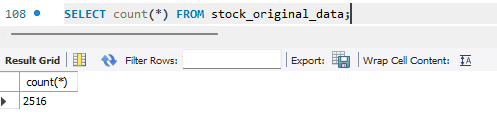

# **👍SQL에서 주가 원본 데이터를 불러와 학습 가능한 형태로 변형후 csv에 저장👍**

In [15]:
# 추세를 분석하는 함수(윌리엄스 변곡점 투자 공식 적용)
from datetime import datetime

def update_trend(candle_data, current_trend, pre_trend, recorded_point):
    
    # 단기 저점(상승) 조건1
    if (candle_data[1]['저가'] <= candle_data[2]['저가'] and candle_data[1]['저가'] <= candle_data[0]['저가'] and candle_data[1]['고가'] <= candle_data[2]['종가']):
        return candle_data, '상승', recorded_point

    # 단기 고점(하락) 조건1
    elif (candle_data[1]['고가'] >= candle_data[2]['고가'] and candle_data[1]['고가'] >= candle_data[0]['고가'] and candle_data[1]['저가'] >= candle_data[2]['종가']):
        return candle_data, '하락', recorded_point

    # 단기 저점(상승) 조건2
    elif (recorded_point and pre_trend == "임시 상승" and candle_data[2]['종가'] >= recorded_point):
        return candle_data, '상승', None

    # 단기 고점(하락) 조건2
    elif (recorded_point and pre_trend == "임시 하락" and candle_data[2]['종가'] <= recorded_point) :
        return candle_data, '하락', None

    # 단기 저점 조건3
    elif (candle_data[2]['종가'] > max(candle_data[1]['고가'], candle_data[0]['고가']) * 1.005):
        return candle_data, '상승', recorded_point  # 종가가 이전 두 캔들의 고가보다 높을 때

    # 단기 고점 조건3
    elif (candle_data[2]['종가'] < min(candle_data[1]['고가'], candle_data[0]['고가'])  * 0.995):
        return candle_data, '하락', recorded_point  # 종가가 이전 두 캔들의 고가보다 낮을 때

    # 임시 상승 조건
    elif (candle_data[1]['저가'] < candle_data[2]['저가'] and candle_data[1]['저가'] < candle_data[0]['저가'] and candle_data[1]['고가'] >= candle_data[2]['종가']):
        return candle_data, '임시 상승', candle_data[1]['고가']

    # 임시 하락 조건
    elif (candle_data[1]['고가'] > candle_data[2]['고가'] and candle_data[1]['고가'] > candle_data[0]['고가'] and candle_data[1]['저가'] <= candle_data[2]['종가']):
        return candle_data, '임시 하락', candle_data[1]['저가']

    else : return candle_data, current_trend, recorded_point

# 최근 20일 평균 거래량 대비 오늘의 거래량 비율을 계산하는 함수
def calculate_recent_avg_volume(group, index, period=20):
    start_idx = max(0, index - period + 1)  # N일 전까지의 시작 인덱스 설정, 단 데이터에 해당 일자만큼 없으면 있는것 만으로 진행
    return group.iloc[start_idx:index + 1]['거래량'].mean()

In [16]:
def create_final_dataset_from_sql(output_csv_path, existing_csv_path):
    # MySQL에서 새로 학습할 데이터 로드
    sql_url = f"jdbc:mysql://{host_ip}:3306/my_db?useSSL=false&characterEncoding=UTF-8"
    table_name = "stock_original_data"
    user_id = "spark_user"
    password = "1234"
    original_data = spark.read.format("jdbc").options(
        url=sql_url,
        driver="com.mysql.jdbc.Driver",
        dbtable=table_name,
        user=user_id,
        password=password
    ).load().toPandas()

    # 기존 CSV 파일 로드
    try:
        completed_data = pd.read_csv(existing_csv_path, encoding="utf-8-sig")
        print("기존 CSV 데이터 로드 완료.")
    except FileNotFoundError:
        completed_data = pd.DataFrame()  # CSV 파일이 없으면 빈 데이터프레임 생성
        print("기존 CSV 파일이 없습니다. 새로 생성합니다.")

    # 중복 제거: 날짜와 종목명 기준
    if not completed_data.empty:
        combined_key_existing = completed_data['날짜'].astype(str) + completed_data['종목명']
        combined_key_new = original_data['날짜'].astype(str) + original_data['종목명']
        original_data = original_data[~combined_key_new.isin(combined_key_existing)]

    if original_data.empty:
        print("중복 제거 후 저장할 데이터가 없습니다.")
        return

    # 추세 계산
    final_results = []
    grouped = original_data.groupby("종목명")

    for ticker, group in grouped:
        group = group.sort_values(by="날짜").reset_index(drop=True)
        current_trend = "초기"
        recorded_point = None
        current_volume_sum = 0
        prev_trend_volume_sum = 0  # 이전 추세 누적 거래량

        results = []
        for i in range(2, len(group)):
            candle_data = [group.iloc[i - 2], group.iloc[i - 1], group.iloc[i]]
            _, new_trend, recorded_point = update_trend(candle_data, current_trend, current_trend, recorded_point)

            if new_trend == "임시 상승" or new_trend == "임시 하락":
                new_trend = current_trend

            if new_trend != current_trend:
                # 새로운 추세로 전환 시
                prev_trend_volume_sum = current_volume_sum  # 이전 추세의 누적 거래량 저장
                current_volume_sum = group.loc[i, '거래량']  # 현재 추세의 첫 거래량으로 초기화
            else:
                current_volume_sum += group.loc[i, '거래량']

            # 단기 추세 거래량 비율 계산
            volume_ratio = round(current_volume_sum / prev_trend_volume_sum, 2) if prev_trend_volume_sum > 0 else 1.0

            # 20일 평균 거래량 비율 계산
            recent_20_avg_volume = calculate_recent_avg_volume(group, i, period=20)
            volume_ratio_20 = round(group.loc[i, '거래량'] / recent_20_avg_volume, 2) if recent_20_avg_volume > 0 else 1.0

            results.append({
                '종목명': group.loc[i, '종목명'],
                '날짜': group.loc[i, '날짜'],
                '등락률': group.loc[i, '등락률'],
                '거래량': group.loc[i, '거래량'],
                '단기 추세': new_trend,
                '단기 추세 거래량 비율': volume_ratio,
                '단기 추세 누적 거래량': current_volume_sum,
                '20일 거래량 비율': volume_ratio_20,
            })
            current_trend = new_trend

        final_results.extend(results)

    if not final_results:
        print("최종 결과 리스트에 변화가 없습니다(전부 중복되는 데이터).")
        return

    final_df = pd.DataFrame(final_results)

    # CSV 파일로 저장 (기존 CSV와 병합)
    if not completed_data.empty:
        final_df = pd.concat([completed_data, final_df], ignore_index=True)

    final_df.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"전처리 완료된 데이터가 {output_csv_path}에 저장되었습니다.")


In [ ]:
create_final_dataset_from_sql("test_data.csv","test_data.csv") #테스트 데이터셋 생성 확인

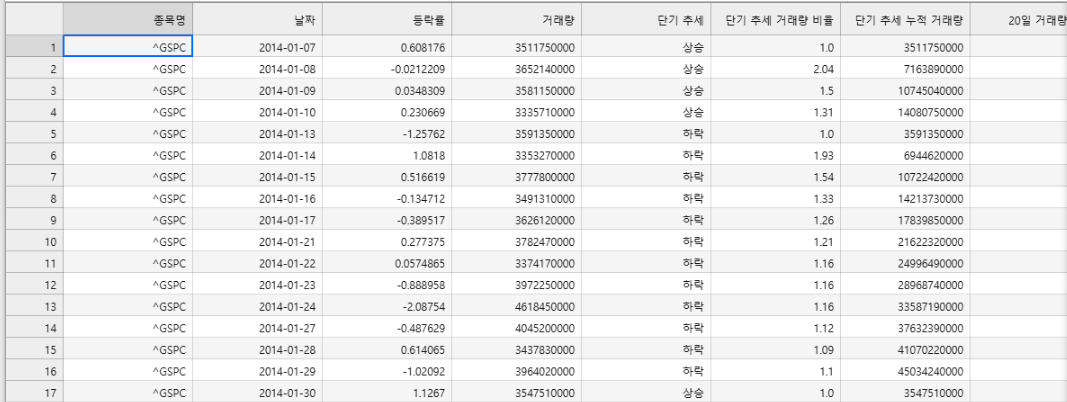

## **👍실제 학습용 데이터셋 만들어보기👍**

In [19]:
# 종목들의 티커 리스트(sp 500의 100개 기업 등락률의 다양성을 감안하여 선정)
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JNJ", "V", "NVDA", "JPM",
    "PG", "XOM", "UNH", "HD", "DIS", "MA", "BAC", "KO", "PEP", "PFE",
    "T", "CSCO", "INTC", "CMCSA", "NFLX", "ADBE", "NKE", "CRM", "AVGO", "QCOM",
    "COST", "TMUS", "MRK", "WMT", "ABBV", "TXN", "VZ", "ABT", "ACN", "LOW",
    "ORCL", "MDT", "AMGN", "INTU", "HON", "BA", "GE", "CAT", "DHR", "SPGI",
    "TMO", "CVX", "GS", "BLK", "MS", "IBM", "MMM", "LMT", "AXP", "RTX",
    "EL", "CL", "MCD", "UPS", "NEE", "SO", "DUK", "SCHW", "ZTS", "PYPL",
    "ADP", "CI", "MMC", "SYK", "AMT", "PLD", "ISRG", "ADI", "GILD", "MDLZ",
    "NOW", "BKNG", "REGN", "TFC", "EW", "BSX", "APD", "VRTX", "BMY", "WM",
    "F", "GM", "NOC", "PANW", "DE", "EOG", "ETN", "AON", "SHW", "LIN"
]

In [45]:
# 시작 및 종료 날짜(10년정도로 지정)
start_date = "2014-10-30"
end_date = "2024-10-30"

# 성공/실패 기록용 리스트
success_list = []
failure_list = []
idx = 1

# 각 종목 데이터를 가져와 저장
for ticker in tickers:
    try:
        print(f"{ticker} 데이터 수집 시작...")
        fetch_and_save_data(ticker, start_date, end_date)
        print(f"{idx}/100번째 {ticker} 데이터 저장 완료!")
        print('=' * 30)
        success_list.append(ticker)  # 성공한 종목 추가
        idx+=1
    except Exception as e:
        print(f"{idx}/100번째 {ticker} 데이터 수집 중 오류 발생: {e}")
        print('*' * 30)
        failure_list.append(ticker)  # 실패한 종목 추가
        idx+=1

# 결과 출력
print("\n===== 결과 요약 =====")
print(f"전체 종목: {len(tickers)}개")
print(f"성공한 종목: {len(success_list)}개")
print(f"실패한 종목: {len(failure_list)}개")
if failure_list:
    print(f"실패한 종목 목록: {failure_list}")

[*********************100%***********************]  1 of 1 completed

AAPL 데이터 수집 시작...


AAPL 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


AAPL 데이터가 성공적으로 저장....
1/100번째 AAPL 데이터 저장 완료!
MSFT 데이터 수집 시작...
MSFT 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


MSFT 데이터가 성공적으로 저장....
2/100번째 MSFT 데이터 저장 완료!
GOOGL 데이터 수집 시작...
GOOGL 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


GOOGL 데이터가 성공적으로 저장....
3/100번째 GOOGL 데이터 저장 완료!
AMZN 데이터 수집 시작...
AMZN 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


AMZN 데이터가 성공적으로 저장....
4/100번째 AMZN 데이터 저장 완료!
META 데이터 수집 시작...
META 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


META 데이터가 성공적으로 저장....
5/100번째 META 데이터 저장 완료!
TSLA 데이터 수집 시작...
TSLA 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


TSLA 데이터가 성공적으로 저장....
6/100번째 TSLA 데이터 저장 완료!
JNJ 데이터 수집 시작...
JNJ 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


JNJ 데이터가 성공적으로 저장....
7/100번째 JNJ 데이터 저장 완료!
V 데이터 수집 시작...
V 데이터를 MySQL에 옮기는 중....


[*********************100%***********************]  1 of 1 completed            


V 데이터가 성공적으로 저장....
8/100번째 V 데이터 저장 완료!
NVDA 데이터 수집 시작...
NVDA 데이터를 MySQL에 옮기는 중....


NVDA 데이터가 성공적으로 저장....
9/100번째 NVDA 데이터 저장 완료!
JPM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


JPM 데이터를 MySQL에 옮기는 중....


JPM 데이터가 성공적으로 저장....
10/100번째 JPM 데이터 저장 완료!
PG 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


PG 데이터를 MySQL에 옮기는 중....


PG 데이터가 성공적으로 저장....
11/100번째 PG 데이터 저장 완료!
XOM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


XOM 데이터를 MySQL에 옮기는 중....


XOM 데이터가 성공적으로 저장....
12/100번째 XOM 데이터 저장 완료!
UNH 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


UNH 데이터를 MySQL에 옮기는 중....


UNH 데이터가 성공적으로 저장....
13/100번째 UNH 데이터 저장 완료!
HD 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


HD 데이터를 MySQL에 옮기는 중....


HD 데이터가 성공적으로 저장....
14/100번째 HD 데이터 저장 완료!
DIS 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


DIS 데이터를 MySQL에 옮기는 중....


DIS 데이터가 성공적으로 저장....
15/100번째 DIS 데이터 저장 완료!
MA 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MA 데이터를 MySQL에 옮기는 중....


MA 데이터가 성공적으로 저장....
16/100번째 MA 데이터 저장 완료!
BAC 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


BAC 데이터를 MySQL에 옮기는 중....


BAC 데이터가 성공적으로 저장....
17/100번째 BAC 데이터 저장 완료!
KO 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


KO 데이터를 MySQL에 옮기는 중....


KO 데이터가 성공적으로 저장....
18/100번째 KO 데이터 저장 완료!
PEP 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


PEP 데이터를 MySQL에 옮기는 중....


PEP 데이터가 성공적으로 저장....
19/100번째 PEP 데이터 저장 완료!
PFE 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


PFE 데이터를 MySQL에 옮기는 중....


PFE 데이터가 성공적으로 저장....
20/100번째 PFE 데이터 저장 완료!
T 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


T 데이터를 MySQL에 옮기는 중....


T 데이터가 성공적으로 저장....
21/100번째 T 데이터 저장 완료!
CSCO 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


CSCO 데이터를 MySQL에 옮기는 중....


CSCO 데이터가 성공적으로 저장....
22/100번째 CSCO 데이터 저장 완료!
INTC 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


INTC 데이터를 MySQL에 옮기는 중....


INTC 데이터가 성공적으로 저장....
23/100번째 INTC 데이터 저장 완료!
CMCSA 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


CMCSA 데이터를 MySQL에 옮기는 중....


CMCSA 데이터가 성공적으로 저장....
24/100번째 CMCSA 데이터 저장 완료!
NFLX 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


NFLX 데이터를 MySQL에 옮기는 중....


NFLX 데이터가 성공적으로 저장....
25/100번째 NFLX 데이터 저장 완료!
ADBE 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ADBE 데이터를 MySQL에 옮기는 중....


ADBE 데이터가 성공적으로 저장....
26/100번째 ADBE 데이터 저장 완료!
NKE 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


NKE 데이터를 MySQL에 옮기는 중....


NKE 데이터가 성공적으로 저장....
27/100번째 NKE 데이터 저장 완료!
CRM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


CRM 데이터를 MySQL에 옮기는 중....


CRM 데이터가 성공적으로 저장....
28/100번째 CRM 데이터 저장 완료!
AVGO 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


AVGO 데이터를 MySQL에 옮기는 중....


AVGO 데이터가 성공적으로 저장....
29/100번째 AVGO 데이터 저장 완료!
QCOM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


QCOM 데이터를 MySQL에 옮기는 중....


QCOM 데이터가 성공적으로 저장....
30/100번째 QCOM 데이터 저장 완료!
COST 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


COST 데이터를 MySQL에 옮기는 중....


COST 데이터가 성공적으로 저장....
31/100번째 COST 데이터 저장 완료!
TMUS 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


TMUS 데이터를 MySQL에 옮기는 중....


TMUS 데이터가 성공적으로 저장....
32/100번째 TMUS 데이터 저장 완료!
MRK 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MRK 데이터를 MySQL에 옮기는 중....


MRK 데이터가 성공적으로 저장....
33/100번째 MRK 데이터 저장 완료!
WMT 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


WMT 데이터를 MySQL에 옮기는 중....


WMT 데이터가 성공적으로 저장....
34/100번째 WMT 데이터 저장 완료!
ABBV 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ABBV 데이터를 MySQL에 옮기는 중....


ABBV 데이터가 성공적으로 저장....
35/100번째 ABBV 데이터 저장 완료!
TXN 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


TXN 데이터를 MySQL에 옮기는 중....


TXN 데이터가 성공적으로 저장....
36/100번째 TXN 데이터 저장 완료!
VZ 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


VZ 데이터를 MySQL에 옮기는 중....


VZ 데이터가 성공적으로 저장....
37/100번째 VZ 데이터 저장 완료!
ABT 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ABT 데이터를 MySQL에 옮기는 중....


ABT 데이터가 성공적으로 저장....
38/100번째 ABT 데이터 저장 완료!
ACN 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ACN 데이터를 MySQL에 옮기는 중....


ACN 데이터가 성공적으로 저장....
39/100번째 ACN 데이터 저장 완료!
LOW 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


LOW 데이터를 MySQL에 옮기는 중....


LOW 데이터가 성공적으로 저장....
40/100번째 LOW 데이터 저장 완료!
ORCL 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ORCL 데이터를 MySQL에 옮기는 중....


ORCL 데이터가 성공적으로 저장....
41/100번째 ORCL 데이터 저장 완료!
MDT 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MDT 데이터를 MySQL에 옮기는 중....


MDT 데이터가 성공적으로 저장....
42/100번째 MDT 데이터 저장 완료!
AMGN 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


AMGN 데이터를 MySQL에 옮기는 중....


AMGN 데이터가 성공적으로 저장....
43/100번째 AMGN 데이터 저장 완료!
INTU 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


INTU 데이터를 MySQL에 옮기는 중....


INTU 데이터가 성공적으로 저장....
44/100번째 INTU 데이터 저장 완료!
HON 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


HON 데이터를 MySQL에 옮기는 중....


HON 데이터가 성공적으로 저장....
45/100번째 HON 데이터 저장 완료!
BA 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


BA 데이터를 MySQL에 옮기는 중....


BA 데이터가 성공적으로 저장....
46/100번째 BA 데이터 저장 완료!
GE 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


GE 데이터를 MySQL에 옮기는 중....


GE 데이터가 성공적으로 저장....
47/100번째 GE 데이터 저장 완료!
CAT 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


CAT 데이터를 MySQL에 옮기는 중....


CAT 데이터가 성공적으로 저장....
48/100번째 CAT 데이터 저장 완료!
DHR 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


DHR 데이터를 MySQL에 옮기는 중....


DHR 데이터가 성공적으로 저장....
49/100번째 DHR 데이터 저장 완료!
SPGI 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


SPGI 데이터를 MySQL에 옮기는 중....


SPGI 데이터가 성공적으로 저장....
50/100번째 SPGI 데이터 저장 완료!
TMO 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


TMO 데이터를 MySQL에 옮기는 중....


TMO 데이터가 성공적으로 저장....
51/100번째 TMO 데이터 저장 완료!
CVX 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


CVX 데이터를 MySQL에 옮기는 중....


CVX 데이터가 성공적으로 저장....
52/100번째 CVX 데이터 저장 완료!
GS 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


GS 데이터를 MySQL에 옮기는 중....


GS 데이터가 성공적으로 저장....
53/100번째 GS 데이터 저장 완료!
BLK 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


BLK 데이터를 MySQL에 옮기는 중....


BLK 데이터가 성공적으로 저장....
54/100번째 BLK 데이터 저장 완료!
MS 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MS 데이터를 MySQL에 옮기는 중....


MS 데이터가 성공적으로 저장....
55/100번째 MS 데이터 저장 완료!
IBM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


IBM 데이터를 MySQL에 옮기는 중....


IBM 데이터가 성공적으로 저장....
56/100번째 IBM 데이터 저장 완료!
MMM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MMM 데이터를 MySQL에 옮기는 중....


MMM 데이터가 성공적으로 저장....
57/100번째 MMM 데이터 저장 완료!
LMT 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


LMT 데이터를 MySQL에 옮기는 중....


LMT 데이터가 성공적으로 저장....
58/100번째 LMT 데이터 저장 완료!
AXP 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


AXP 데이터를 MySQL에 옮기는 중....


AXP 데이터가 성공적으로 저장....
59/100번째 AXP 데이터 저장 완료!
RTX 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


RTX 데이터를 MySQL에 옮기는 중....


RTX 데이터가 성공적으로 저장....
60/100번째 RTX 데이터 저장 완료!
EL 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


EL 데이터를 MySQL에 옮기는 중....


EL 데이터가 성공적으로 저장....
61/100번째 EL 데이터 저장 완료!
CL 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


CL 데이터를 MySQL에 옮기는 중....


CL 데이터가 성공적으로 저장....
62/100번째 CL 데이터 저장 완료!
MCD 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MCD 데이터를 MySQL에 옮기는 중....


MCD 데이터가 성공적으로 저장....
63/100번째 MCD 데이터 저장 완료!
UPS 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


UPS 데이터를 MySQL에 옮기는 중....


UPS 데이터가 성공적으로 저장....
64/100번째 UPS 데이터 저장 완료!
NEE 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


NEE 데이터를 MySQL에 옮기는 중....


NEE 데이터가 성공적으로 저장....
65/100번째 NEE 데이터 저장 완료!
SO 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


SO 데이터를 MySQL에 옮기는 중....


SO 데이터가 성공적으로 저장....
66/100번째 SO 데이터 저장 완료!
DUK 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


DUK 데이터를 MySQL에 옮기는 중....


DUK 데이터가 성공적으로 저장....
67/100번째 DUK 데이터 저장 완료!
SCHW 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


SCHW 데이터를 MySQL에 옮기는 중....


SCHW 데이터가 성공적으로 저장....
68/100번째 SCHW 데이터 저장 완료!
ZTS 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ZTS 데이터를 MySQL에 옮기는 중....


ZTS 데이터가 성공적으로 저장....
69/100번째 ZTS 데이터 저장 완료!
PYPL 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


PYPL 데이터를 MySQL에 옮기는 중....


PYPL 데이터가 성공적으로 저장....
70/100번째 PYPL 데이터 저장 완료!
ADP 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ADP 데이터를 MySQL에 옮기는 중....


ADP 데이터가 성공적으로 저장....
71/100번째 ADP 데이터 저장 완료!
CI 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


CI 데이터를 MySQL에 옮기는 중....


CI 데이터가 성공적으로 저장....
72/100번째 CI 데이터 저장 완료!
MMC 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MMC 데이터를 MySQL에 옮기는 중....


MMC 데이터가 성공적으로 저장....
73/100번째 MMC 데이터 저장 완료!
SYK 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


SYK 데이터를 MySQL에 옮기는 중....


SYK 데이터가 성공적으로 저장....
74/100번째 SYK 데이터 저장 완료!
AMT 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


AMT 데이터를 MySQL에 옮기는 중....


AMT 데이터가 성공적으로 저장....
75/100번째 AMT 데이터 저장 완료!
PLD 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


PLD 데이터를 MySQL에 옮기는 중....


PLD 데이터가 성공적으로 저장....
76/100번째 PLD 데이터 저장 완료!
ISRG 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ISRG 데이터를 MySQL에 옮기는 중....


ISRG 데이터가 성공적으로 저장....
77/100번째 ISRG 데이터 저장 완료!
ADI 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ADI 데이터를 MySQL에 옮기는 중....


ADI 데이터가 성공적으로 저장....
78/100번째 ADI 데이터 저장 완료!
GILD 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


GILD 데이터를 MySQL에 옮기는 중....


GILD 데이터가 성공적으로 저장....
79/100번째 GILD 데이터 저장 완료!
MDLZ 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


MDLZ 데이터를 MySQL에 옮기는 중....


MDLZ 데이터가 성공적으로 저장....
80/100번째 MDLZ 데이터 저장 완료!
NOW 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


NOW 데이터를 MySQL에 옮기는 중....


NOW 데이터가 성공적으로 저장....
81/100번째 NOW 데이터 저장 완료!
BKNG 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


BKNG 데이터를 MySQL에 옮기는 중....


BKNG 데이터가 성공적으로 저장....
82/100번째 BKNG 데이터 저장 완료!
REGN 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


REGN 데이터를 MySQL에 옮기는 중....


REGN 데이터가 성공적으로 저장....
83/100번째 REGN 데이터 저장 완료!
TFC 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


TFC 데이터를 MySQL에 옮기는 중....


TFC 데이터가 성공적으로 저장....
84/100번째 TFC 데이터 저장 완료!
EW 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


EW 데이터를 MySQL에 옮기는 중....


EW 데이터가 성공적으로 저장....
85/100번째 EW 데이터 저장 완료!
BSX 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


BSX 데이터를 MySQL에 옮기는 중....


BSX 데이터가 성공적으로 저장....
86/100번째 BSX 데이터 저장 완료!
APD 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


APD 데이터를 MySQL에 옮기는 중....


APD 데이터가 성공적으로 저장....
87/100번째 APD 데이터 저장 완료!
VRTX 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


VRTX 데이터를 MySQL에 옮기는 중....


VRTX 데이터가 성공적으로 저장....
88/100번째 VRTX 데이터 저장 완료!
BMY 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


BMY 데이터를 MySQL에 옮기는 중....


BMY 데이터가 성공적으로 저장....
89/100번째 BMY 데이터 저장 완료!
WM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


WM 데이터를 MySQL에 옮기는 중....


WM 데이터가 성공적으로 저장....
90/100번째 WM 데이터 저장 완료!
F 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


F 데이터를 MySQL에 옮기는 중....


F 데이터가 성공적으로 저장....
91/100번째 F 데이터 저장 완료!
GM 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


GM 데이터를 MySQL에 옮기는 중....


GM 데이터가 성공적으로 저장....
92/100번째 GM 데이터 저장 완료!
NOC 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


NOC 데이터를 MySQL에 옮기는 중....


NOC 데이터가 성공적으로 저장....
93/100번째 NOC 데이터 저장 완료!
PANW 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


PANW 데이터를 MySQL에 옮기는 중....


PANW 데이터가 성공적으로 저장....
94/100번째 PANW 데이터 저장 완료!
DE 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


DE 데이터를 MySQL에 옮기는 중....


DE 데이터가 성공적으로 저장....
95/100번째 DE 데이터 저장 완료!
EOG 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


EOG 데이터를 MySQL에 옮기는 중....


EOG 데이터가 성공적으로 저장....
96/100번째 EOG 데이터 저장 완료!
ETN 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


ETN 데이터를 MySQL에 옮기는 중....


ETN 데이터가 성공적으로 저장....
97/100번째 ETN 데이터 저장 완료!
AON 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


AON 데이터를 MySQL에 옮기는 중....


AON 데이터가 성공적으로 저장....
98/100번째 AON 데이터 저장 완료!
SHW 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


SHW 데이터를 MySQL에 옮기는 중....


SHW 데이터가 성공적으로 저장....
99/100번째 SHW 데이터 저장 완료!
LIN 데이터 수집 시작...


[*********************100%***********************]  1 of 1 completed


LIN 데이터를 MySQL에 옮기는 중....


LIN 데이터가 성공적으로 저장....
100/100번째 LIN 데이터 저장 완료!

===== 결과 요약 =====
전체 종목: 100개
성공한 종목: 100개
실패한 종목: 0개


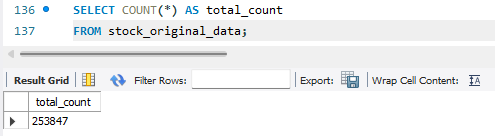
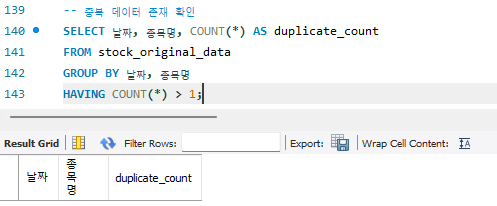
#### 확인 결과, 총 데이터는 약 25만개이며 중복 데이터는 없는 것으로 확인되었다.

In [54]:
# 학습 가능한 형태로 변환
create_final_dataset_from_sql("final_data.csv","final_data.csv") #정상적으로 생성된 것을 확인

기존 CSV 데이터 로드 완료.
최종 결과 리스트에 변화가 없습니다(전부 중복되는 데이터).


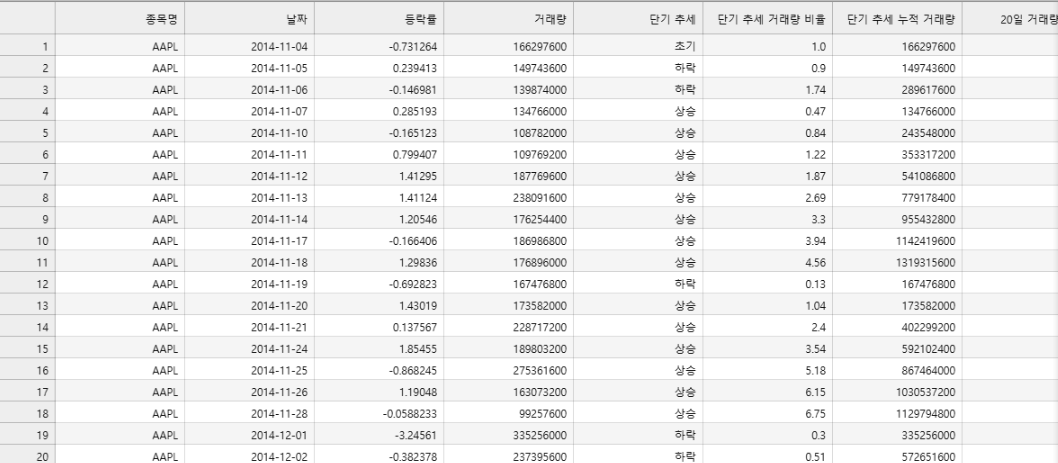

# **👍데이터 탐색 및 예측 모델 생성👍**

In [88]:
# 전처리 해야할 것
#1. 추세가 초기인 데이터는 그날의 등락률이 양수면 상승, 음수면 하락으로 변경
#2. 결측값 존재 확인

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
spark.stop()
# 스파크 세션 생성
spark = SparkSession.builder \
    .appName("Stock Prediction") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# CSV 파일 로드
data_path = "final_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

df.createOrReplaceTempView("stock_data") # Spark DataFrame을 SQL 테이블로 등록

## **👍추가적으로 필요한 전처리 하기👍**

In [21]:
# 다음날의 등락률 기준으로 상승/하락 구분하는 목표(라벨)컬럼 추가
from pyspark.sql.window import Window
from pyspark.sql.functions import *

window_spec = Window.partitionBy("종목명").orderBy("날짜") # 종목별 날짜 순서로 정렬
df = df.withColumn("다음날 등락률", lead("등락률", 1).over(window_spec)) # 다음날 등락률 계산
df = df.withColumn("목표", when(col("다음날 등락률") > 0, 1).otherwise(0)) # 목표 컬럼 업데이트 (다음날 등락률 기반으로 상승/하락 여부 설정)
df = df.drop("다음날 등락률") # "다음날 등락률" 컬럼 삭제 (필요 시)

# 추세=초기(해당 종목의 가장 오래된 데이터)인 데이터의 초기 값을 그날의 등락률에 따라 상승 혹은 하락으로 조정
# '단기 추세' 컬럼 업데이트: '초기'인 경우 등락률 기준으로 변경
df = df.withColumn(
    "단기 추세",
    when((col("단기 추세") == "초기") & (col("등락률") >= 0), "상승")
    .when((col("단기 추세") == "초기") & (col("등락률") < 0), "하락")
    .otherwise(col("단기 추세"))  # 기존 값 유지
)

# 기존 "단기 추세" 컬럼 값을 인코딩 (상승 -> 1, 하락 -> 0)
df = df.withColumn("단기 추세", when(col("단기 추세") == "상승", 1).otherwise(0))

# 각 컬럼에서 결측값이 있는 행의 수를 확인 : 없음. 
for column in df.columns : print(f"컬럼 '{column}'의 결측값 개수: {df.filter(col(column).isNull()).count()}")

# 결과 확인
df.show(30)

컬럼 '종목명'의 결측값 개수: 0
컬럼 '날짜'의 결측값 개수: 0


컬럼 '등락률'의 결측값 개수: 0
컬럼 '거래량'의 결측값 개수: 0
컬럼 '단기 추세'의 결측값 개수: 0
컬럼 '단기 추세 거래량 비율'의 결측값 개수: 0
컬럼 '단기 추세 누적 거래량'의 결측값 개수: 0
컬럼 '20일 거래량 비율'의 결측값 개수: 0
컬럼 '목표'의 결측값 개수: 0


+------+----------+----------+-------+---------+---------------------+---------------------+----------------+----+
|종목명|      날짜|    등락률| 거래량|단기 추세|단기 추세 거래량 비율|단기 추세 누적 거래량|20일 거래량 비율|목표|
+------+----------+----------+-------+---------+---------------------+---------------------+----------------+----+
|  SPGI|2014-11-04| -0.687051| 927700|        0|                  1.0|               927700|            0.72|   1|
|  SPGI|2014-11-05|   1.02655|1882900|        1|                 2.03|              1882900|             1.3|   0|
|  SPGI|2014-11-06|  -0.60747|1267700|        1|                  3.4|              3150600|             0.9|   0|
|  SPGI|2014-11-07|-0.0555566|1073200|        0|                 0.34|              1073200|            0.79|   1|
|  SPGI|2014-11-10|  0.733818| 843300|        0|                 0.61|              1916500|            0.66|   0|
|  SPGI|2014-11-11|  -1.31346|1356900|        0|                 1.04|              3273400|            1.05|   1|
|  SPG

In [23]:
# TempView 생성 및 간단하게 데이터 개수만 확인
df.createOrReplaceTempView("stock_data")
spark.sql("SELECT count(*) FROM stock_data").show()

+--------+
|count(1)|
+--------+
|  253644|
+--------+



In [24]:
# 추세가 실질적인 영향을 주는 지 확인해보기

query = """
    SELECT 
        `목표`, 
        COUNT(*) AS count, 
        AVG(`등락률`) AS avg_return
    FROM stock_data
    WHERE `단기 추세` = 1
      AND `20일 거래량 비율` >= 1.5 
      AND `단기 추세 거래량 비율` >= 1.2
    GROUP BY `목표`
"""

# 쿼리 실행
result = spark.sql(query)

# 결과 확인 : 거의 정확히 반반...
result.show()

+----+-----+------------------+
|목표|count|        avg_return|
+----+-----+------------------+
|   1| 1880|  2.24628465425532|
|   0| 1929|2.4472705221876607|
+----+-----+------------------+



In [25]:
# 등락 여부를 구분하는 모델 생성 - 50대 50
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

# 피처 컬럼 설정
feature_columns = ["등락률", "거래량", "단기 추세", "단기 추세 거래량 비율", "단기 추세 누적 거래량", "20일 거래량 비율"]
df = df.drop("features")  # 기존 features 칼럼 제거
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

 
train_data, test_data = df.randomSplit([0.85, 0.15], seed=42) # 데이터 분리
rf = RandomForestClassifier(featuresCol="features", labelCol="목표", numTrees=100, maxDepth=5) # RandomForest 모델 생성 및 학습
rf_model = rf.fit(train_data)

predictions = rf_model.transform(test_data) # 테스트 데이터 예측

evaluator = BinaryClassificationEvaluator(labelCol="목표", rawPredictionCol="rawPrediction", metricName="areaUnderROC") # 평가 (ROC-AUC)
roc_auc = evaluator.evaluate(predictions)
print(f"ROC-AUC 점수: {roc_auc:.4f}")

# 결과 출력
predictions.select("features", "목표", "prediction").show(30)

ROC-AUC 점수: 0.5162
+--------------------+----+----------+
|            features|목표|prediction|
+--------------------+----+----------+
|[1.23029,1257200....|   1|       1.0|
|[0.474091,818100....|   1|       1.0|
|[-2.0382,2577400....|   1|       1.0|
|[0.376269,745500....|   0|       1.0|
|[-1.42528,766100....|   1|       1.0|
|[5.98181,3777400....|   0|       0.0|
|[-0.686165,109110...|   1|       1.0|
|[0.209323,2370600...|   0|       1.0|
|[0.424743,935700....|   0|       1.0|
|[0.915081,2016200...|   1|       1.0|
|[0.0,1760400.0,1....|   1|       1.0|
|[-0.183259,130520...|   0|       1.0|
|[-1.81369,1400300...|   1|       1.0|
|[0.968827,1027000...|   1|       1.0|
|[0.921529,951600....|   0|       1.0|
|[-1.38514,1044100...|   0|       1.0|
|[-0.163933,837900...|   1|       1.0|
|[-0.606058,868300...|   1|       1.0|
|[0.99552,1039100....|   1|       1.0|
|[-0.958121,217270...|   1|       1.0|
|[3.13008,2266000....|   1|       0.0|
|[-0.984252,100410...|   1|       1.0|
|[2.9292

# **📚1차 결과 분석 및 프로젝트 변경 내용**

### **변경 내용**
기존에는 익일의 상승 혹은 하락 여부를 분류하는 분류형 문제로 접근했으나, 모델 학습 및 조건식 적용 결과, **상승 혹은 하락 확률이 50대 50에 수렴**했으며 **학습 결과 역시 ROC정확도가 0.51정도로 익일의 단순 상승 하락 여부의 구분이 매우 어려운 것으로 확인**되었다. 이에 따라 **라벨값을 추세 누적 등락률 합으로 변경**하여 **회귀 형태의 문제**로 프로젝트 계획을 수정.

### **새로 만든 컬럼: `추세_기대_등락률`**
- **내용**: 동일한 단기 추세(상승 또는 하락)가 지속되는 동안의 등락률을 누적하여 계산한 컬럼. 추세가 유지되는 동안 투자를 지속할때 기대 가능한 수익률을 계산해 Label값으로 활용

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.window import Window

# 추세 변화 감지
window_spec = Window.partitionBy("종목명").orderBy("날짜")
df = df.withColumn("추세_변화", when(lag("단기 추세", 1).over(window_spec) != col("단기 추세"), 1).otherwise(0))

# 추세별로 그룹 생성
window_cumsum = Window.partitionBy("종목명").orderBy("날짜")
df = df.withColumn("추세_그룹", _sum("추세_변화").over(window_cumsum))

# 추세 그룹 내 누적 등락률 계산
window_group = Window.partitionBy("종목명", "추세_그룹")
df = df.withColumn("추세_누적_등락률",round(_sum("등락률").over(window_group),2))

# 추세 그룹 내 최대 누적 등락률 추세_누적_등락률 컬럼의 값을 추가
df = df.withColumn("추세_누적_등락률",round(_max("추세_누적_등락률").over(window_group),2))

# Step 5: 추세 변화와 추세 그룹 컬럼 삭제
df = df.drop("추세_변화", "추세_그룹")

# 결과 확인
df.show(30)


In [268]:
from pyspark.sql import Window
from pyspark.sql.functions import col, when, lag, sum as _sum, round

# Step 1: 추세 변경 감지 (단기 추세가 변할 때 마다 그룹 시작)
window_spec = Window.partitionBy("종목명").orderBy("날짜")
df = df.withColumn(
    "추세_변화", 
    when(lag("단기 추세").over(window_spec) != col("단기 추세"), 1).otherwise(0)
)

# Step 2: 추세 그룹 번호 생성
window_cumsum = Window.partitionBy("종목명").orderBy("날짜")
df = df.withColumn(
    "추세_그룹", 
    _sum("추세_변화").over(window_cumsum)
)

# Step 3: 추세 누적 등락률 계산 (새 컬럼 추가)
window_group = Window.partitionBy("종목명", "추세_그룹").orderBy("날짜")
df = df.withColumn(
    "추세_누적_등락률", 
    round(_sum("등락률").over(window_group), 2)
)

# Step 4: 임시 컬럼 삭제 (데이터 깔끔하게 유지)
df = df.drop("추세_변화", "추세_그룹", "목표")

# Step 5: 결과 확인
df.show(30, truncate=False)

+------+----------+----------+-------+---------+---------------------+---------------------+----------------+----------------+----------------+
|종목명|날짜      |등락률    |거래량 |단기 추세|단기 추세 거래량 비율|단기 추세 누적 거래량|20일 거래량 비율|추세_전체_등락률|추세_누적_등락률|
+------+----------+----------+-------+---------+---------------------+---------------------+----------------+----------------+----------------+
|SPGI  |2014-11-04|-0.687051 |927700 |0        |1.0                  |927700               |0.72            |-0.69           |-0.69           |
|SPGI  |2014-11-05|1.02655   |1882900|1        |2.03                 |1882900              |1.3             |0.42            |1.03            |
|SPGI  |2014-11-06|-0.60747  |1267700|1        |3.4                  |3150600              |0.9             |0.42            |0.42            |
|SPGI  |2014-11-07|-0.0555566|1073200|0        |0.34                 |1073200              |0.79            |1.01            |-0.06           |
|SPGI  |2014-11-10|0.733818  |843300 |0      

In [269]:
from pyspark.sql.functions import col, round

# '남은 추세 등락률' 컬럼 추가
df = df.withColumn(
    "목표",
    round(col("추세_전체_등락률") - col("추세_누적_등락률"), 2)  # 두 값의 차이를 계산
)

# 결과 확인
df.show(30, truncate=False)

+------+----------+----------+-------+---------+---------------------+---------------------+----------------+----------------+----------------+-----+
|종목명|날짜      |등락률    |거래량 |단기 추세|단기 추세 거래량 비율|단기 추세 누적 거래량|20일 거래량 비율|추세_전체_등락률|추세_누적_등락률|목표 |
+------+----------+----------+-------+---------+---------------------+---------------------+----------------+----------------+----------------+-----+
|SPGI  |2014-11-04|-0.687051 |927700 |0        |1.0                  |927700               |0.72            |-0.69           |-0.69           |0.0  |
|SPGI  |2014-11-05|1.02655   |1882900|1        |2.03                 |1882900              |1.3             |0.42            |1.03            |-0.61|
|SPGI  |2014-11-06|-0.60747  |1267700|1        |3.4                  |3150600              |0.9             |0.42            |0.42            |0.0  |
|SPGI  |2014-11-07|-0.0555566|1073200|0        |0.34                 |1073200              |0.79            |1.01            |-0.06           |1.07 |
|SPGI

# **👍2차 모델 학습 및 결과 분석👍**

In [270]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# '추세 전체 등락률' 제외하고 사용할 특성 컬럼 정의
feature_columns = [
    "등락률", "거래량", "단기 추세", "단기 추세 거래량 비율", 
    "단기 추세 누적 거래량", "20일 거래량 비율", "추세_누적_등락률"
]

# VectorAssembler를 사용하여 입력 피처 생성
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# 데이터 분리 (학습 데이터와 테스트 데이터)
train_data, test_data = df.randomSplit([0.85, 0.15], seed=42)

# 선형 회귀 모델 생성 및 학습
lr = LinearRegression(featuresCol="features", labelCol="목표", maxIter=100, regParam=0.1, elasticNetParam=0.8)
lr_model = lr.fit(train_data)

# 테스트 데이터 예측
predictions = lr_model.transform(test_data)

# 평가
evaluator = RegressionEvaluator(labelCol="목표", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"RMSE: {rmse:.4f}")

df= df.drop("features")

# 결과 확인
predictions.select("목표", "prediction").show(30)


RMSE: 3.1094
+--------------------+-----+-------------------+
|            features| 목표|         prediction|
+--------------------+-----+-------------------+
|[1.23029,1257200....| 0.41| -1.234952933228647|
|[0.474091,818100....|-0.27|-1.2606479446785512|
|[-2.0382,2577400....|-5.83| -1.486845013759442|
|[0.376269,745500....|  0.0| 1.1982654264177348|
|[-1.42528,766100....|  0.0|-1.5511370285055355|
|[5.98181,3777400....|-2.19| 1.5553402921926864|
|[-0.686165,109110...|  0.0|-1.3800051327735186|
|[0.209323,2370600...| 1.37| 1.1429853776024979|
|[0.424743,935700....|  0.0|  1.191784610735047|
|[0.915081,2016200...| 9.95| 1.2360578208822381|
|[0.0,1760400.0,1....| 2.38| 1.3839401253266235|
|[-0.183259,130520...|-0.85|-1.3615313330328507|
|[-1.81369,1400300...| 1.02|-1.4749220944631736|
|[0.968827,1027000...| 0.03|  1.168341000407213|
|[0.921529,951600....|-0.89| 1.1900097889941998|
|[-1.38514,1044100...|-0.35| -1.438996962176224|
|[-0.163933,837900...|  0.0| -1.335744251054897|
|[-0.6060

In [331]:
# 증가 예측 조건별 데이터 필터링
conditions = [
    (predictions.filter(col("prediction") > 1.1), "1.1 초과"),
    (predictions.filter(col("prediction") > 1.2), "1.2 초과"),
    (predictions.filter(col("prediction") > 1.3), "1.3 초과"),
    (predictions.filter(col("prediction") > 1.5), "1.5 초과"),
    (predictions.filter(col("prediction") > 1.8), "1.8 초과"),
    (predictions.filter(col("prediction") > 2.0), "2.0 초과")
]

# 결과 계산 및 출력
for condition, label in conditions:
    count = condition.count()  # 조건에 맞는 항목 수
    if count > 0:
        avg_goal = condition.select("목표").groupBy().avg("목표").collect()[0][0]
        print(f"{label} 조건 - 항목 수: {count}, 추세 기대 수익률 : {avg_goal:.2f} %")
    else:
        print(f"{label} 조건 - 항목 수: 0, 목표 평균: N/A")

1.1 초과 조건 - 항목 수: 12261, 추세 기대 수익률 : 1.35 %


1.2 초과 조건 - 항목 수: 6025, 추세 기대 수익률 : 1.51 %


1.3 초과 조건 - 항목 수: 2562, 추세 기대 수익률 : 1.58 %


1.5 초과 조건 - 항목 수: 553, 추세 기대 수익률 : 1.69 %


1.8 초과 조건 - 항목 수: 110, 추세 기대 수익률 : 2.57 %


2.0 초과 조건 - 항목 수: 62, 추세 기대 수익률 : 3.09 %


In [298]:
# 하락 예측 조건별 데이터 필터링
negative_conditions = [
    (predictions.filter(col("prediction") < -1.3), "-1.3 미만"),
    (predictions.filter(col("prediction") < -1.5), "-1.5 미만"),
    (predictions.filter(col("prediction") < -1.8), "-1.8 미만"),
    (predictions.filter(col("prediction") < -2.0), "-2.0 미만")
]

# 결과 계산 및 출력
for condition, label in negative_conditions:
    count = condition.count()  # 조건에 맞는 항목 수
    if count > 0:
        avg_goal = condition.select("목표").groupBy().avg("목표").collect()[0][0]
        print(f"{label} 조건 - 항목 수: {count}, 추세 기대 수익률 : {avg_goal:.2f} %")
    else:
        print(f"{label} 조건 - 항목 수: 0, 추세 기대 수익률 : N/A")

-1.3 미만 조건 - 항목 수: 20028, 추세 기대 수익률 : -1.50 %


-1.5 미만 조건 - 항목 수: 5578, 추세 기대 수익률 : -1.82 %


-1.8 미만 조건 - 항목 수: 721, 추세 기대 수익률 : -2.48 %


-2.0 미만 조건 - 항목 수: 242, 추세 기대 수익률 : -3.20 %


In [329]:
# 몇가지 추가 조건
'''
조건1. 20일 거래량 비율이 1.5이상이면서 등락률이 5%이상이고 예측값이 1.3초과인 경우
조건2. 20일 거래량 비율이 1.5이상이면서 등락률이 -5%이하이고 예측값이 -1.3미만인 경우
조건3. 단기 추세 거래량 비율이 0.3초과 0.8미만이면서 등락률이 5%이상이고 예측값이 1.3초과인 경우
조건4. 단기 추세 거래량 비율이 0.3초과 0.8미만이면서 등락률이 -5%이하이고 예측값이 -1.3미만인 경우
조건5. 20일 거래량 비율이 2이상이면서 등락률이 8%이상이고 예측값이 1 초과인 경우
조건6. 20일 거래량 비율이 2이상이면서 등락률이 -8%이하이고 예측값이 -1미만인 경우
'''


custom_conditions = [
    (predictions.filter((col("20일 거래량 비율") >= 1.5) & 
                        (col("등락률") >= 5) & 
                        (col("prediction") > 1.3)), 
     "조건 1: 20일 거래량 비율 >= 1.5, 등락률 >= 5%, 예측값 > 1.3"),
     
    (predictions.filter((col("20일 거래량 비율") >= 1.5) & 
                        (col("등락률") <= -5) & 
                        (col("prediction") < -1.3)), 
     "조건 2: 20일 거래량 비율 >= 1.5, 등락률 <= -5%, 예측값 < -1.3"),
     
    (predictions.filter((col("단기 추세 거래량 비율") > 0.3) & 
                        (col("단기 추세 거래량 비율") < 0.8) & 
                        (col("등락률") >= 5) & 
                        (col("prediction") > 1.3)), 
     "조건 3: 단기 추세 거래량 비율 > 0.3, < 0.8, 등락률 >= 5%, 예측값 > 1.3"),
     
    (predictions.filter((col("단기 추세 거래량 비율") > 0.3) & 
                        (col("단기 추세 거래량 비율") < 0.8) & 
                        (col("등락률") <= -5) & 
                        (col("prediction") < -1.3)), 
     "조건 4: 단기 추세 거래량 비율 > 0.3, < 0.8, 등락률 <= -5%, 예측값 < -1.3"),
     
    (predictions.filter((col("20일 거래량 비율") >= 2) & 
                        (col("등락률") >= 8) & 
                        (col("prediction") > 1)), 
     "조건 5: 20일 거래량 비율 >= 2, 등락률 >= 15%, 예측값 > 1"),
     
    (predictions.filter((col("20일 거래량 비율") >= 2) & 
                        (col("등락률") <= -8) & 
                        (col("prediction") < -1)), 
     "조건 6: 20일 거래량 비율 >= 2, 등락률 <= -8%, 예측값 < -1")
]

# 결과 계산 및 출력
for condition, label in custom_conditions:
    count = condition.count()  # 조건에 맞는 항목 수 계산
    if count > 0:
        avg_goal = condition.select("목표").groupBy().avg("목표").collect()[0][0]  # 목표 평균 계산
        print(f"{label} 조건 - 항목 수: {count}, 추세 기대 수익률: {avg_goal:.2f}%")
    else:
        print(f"{label} 조건 - 항목 수: 0, 추세 기대 수익률: N/A")


조건 1: 20일 거래량 비율 >= 1.5, 등락률 >= 5%, 예측값 > 1.3 조건 - 항목 수: 178, 추세 기대 수익률: 1.62%


조건 2: 20일 거래량 비율 >= 1.5, 등락률 <= -5%, 예측값 < -1.3 조건 - 항목 수: 202, 추세 기대 수익률: -2.54%


조건 3: 단기 추세 거래량 비율 > 0.3, < 0.8, 등락률 >= 5%, 예측값 > 1.3 조건 - 항목 수: 98, 추세 기대 수익률: 1.96%


조건 4: 단기 추세 거래량 비율 > 0.3, < 0.8, 등락률 <= -5%, 예측값 < -1.3 조건 - 항목 수: 52, 추세 기대 수익률: -2.89%


조건 5: 20일 거래량 비율 >= 2, 등락률 >= 8%, 예측값 > 1 조건 - 항목 수: 46, 추세 기대 수익률: 1.51%


조건 6: 20일 거래량 비율 >= 2, 등락률 <= -8%, 예측값 < -1 조건 - 항목 수: 44, 추세 기대 수익률: -2.91%


## **📚2차 모델의 예측 패턴 분석**:
  - **단순 음수 예측 (`prediction < 0`)**:
| **조건**         | **항목 수** | **추세 기대 수익률 (평균)** |
|------------------|-------------|----------------------------|
| `prediction > 1.3` | 2562        | 1.58%                     |
| `prediction > 1.5` | 553         | 1.69%                     |
| `prediction > 1.8` | 193         | 2.57%                     |
| `prediction > 2.0` | 62          | 3.09%                     |
    - `목표` 값도 음수로 나타나는 경향이 강함.
    - 예측값이 `-1.5 이하`일 경우, 평균적으로 더 큰 음수 수익률을 기록함.  
      → **공매도**와 같은 하락 추세 활용 전략에 도움을 기대.
---
  - **단순 양수 예측 (`prediction > 0`)**:
| **조건**         | **항목 수** | **추세 기대 수익률 (평균)** |
|------------------|-------------|----------------------------|
| `prediction < -1.3` | 20028       | -1.50%                    |
| `prediction < -1.5` | 5578        | -1.82%                    |
| `prediction < -1.8` | 721         | -2.48%                    |
| `prediction < -2.0` | 242         | -3.20%                    |
    - `목표` 값이 양수로 나타나는 경향이 있으며, 예측값이 `1.5 이상`일 때 수익률 상승 가능성이 높음.
      → **상승 투자 전략**에서 활용 가능하나 경우의 수가 조금 적은 부분이 아쉬움.
---
  - **이제 실제 활용방안을 모색해보고 프로젝트를 마무리할 예정**:

In [306]:
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S") # 현재 날짜와 시간 가져오기
model_path = f"전체예측모델_{current_time}" # 저장 경로 설정
lr_model.save(model_path) # 모델 저장

print(f"모델이 저장되었습니다: {model_path}")

모델이 저장되었습니다: 전체예측모델_2024-12-20_14-29-42.csv


In [ ]:
# PySpark DataFrame을 Pandas DataFrame으로 변환
pandas_df = df.toPandas()

# CSV 파일 저장 경로
output_path = "final_data(24.10.30).csv"

# CSV 파일 저장
pandas_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"CSV 파일이 저장되었습니다: {output_path}")

# 📈 최종 활용 방안 및 마무리 보고서 : 데이터 기반 미국 주식 투자 전략

---
## 🔍 **분석 과정 요약**

1️⃣ **데이터 수집**  
- Yahoo Finance API를 통해 주식 데이터를 수집.  
- 종목명, 날짜, 종가, 고가, 저가, 등락률, 거래량 등 주요 지표 활용.

2️⃣ **데이터 전처리**  
- 결측치 제거, 불필요한 컬럼 삭제
- 추세, 거래량 비율 등 파생 변수 생성, 파생 변수는 투자서적 참고

3️⃣ **모델 학습**  
- 선형 회귀 모델로 전체 데이터 기반 예측을 진행.  

4️⃣ **조건별 분석**  
- 상승/하락 예측값에 따라 수익률 및 위험도 평가.

5️⃣ **활용 방안 및 향후 계획**  
- 상승 가능성이 높은 종목 자동 추천.  
- 공매도 활용으로 하락 위험 종목 관리.
- 자동화된 데이터 업데이트와 모델 학습 시스템 구축.


---

## 🔍 **분석 결과 요약**

### 1️⃣ **예측값 기준 상승/하락 구간 분석**
| 조건                          | 항목 수  | 추세 기대 수익률 (평균) |
|-------------------------------|----------|--------------------------|
| **예측값 > 1.3**              | 2,562    | 1.58%                   |
| **예측값 > 1.5**              | 553      | 1.69%                   |
| **예측값 > 1.8**              | 193      | 2.57%                   |
| **예측값 > 2.0**              | 62       | 3.09%                   |

| 조건                          | 항목 수  | 추세 기대 수익률 (평균) |
|-------------------------------|----------|--------------------------|
| **예측값 < -1.3**             | 20,028   | -1.50%                  |
| **예측값 < -1.5**             | 5,578    | -1.82%                  |
| **예측값 < -1.8**             | 721      | -2.48%                  |
| **예측값 < -2.0**             | 242      | -3.20%                  |

---

### 2️⃣ **복합 조건별 분석**
| 조건                                                         | 항목 수 | 추세 기대 수익률 |
|--------------------------------------------------------------|---------|------------------|
| **20일 거래량 비율 ≥ 1.5, 등락률 ≥ 5%, 예측값 > 1.3**        | 178     | 1.62%           |
| **20일 거래량 비율 ≥ 1.5, 등락률 ≤ -5%, 예측값 < -1.3**      | 202     | -2.54%          |
| **단기 추세 거래량 비율 0.3 ~ 0.8, 등락률 ≥ 5%, 예측값 > 1.3**| 98      | 1.96%           |
| **단기 추세 거래량 비율 0.3 ~ 0.8, 등락률 ≤ -5%, 예측값 < -1.3**| 52      | -2.89%          |
| **20일 거래량 비율 ≥ 2, 등락률 ≥ 8%, 예측값 > 1.0**          | 46      | 1.51%           |
| **20일 거래량 비율 ≥ 2, 등락률 ≤ -8%, 예측값 < -1.0**        | 44      | -2.91%          |

---

## 🛠️ 활용 방안

1. **📊 투자 시뮬레이션**
   - 상승 구간: **예측값 > 1.3** 또는 **20일 거래량 비율 ≥ 1.5 & 등락률 ≥ 5%** 조건을 활용해 매수 전략 설계.
   - 하락 구간: **예측값 < -1.3** 또는 **20일 거래량 비율 ≥ 1.5 & 등락률 ≤ -5%** 조건을 활용해 공매도 전략 설계.

2. **📈 종목 선택 기준**
   - 단기 추세와 거래량 비율의 조합을 바탕으로 상승 가능성이 높은 종목 선별.
   - 복합 조건을 통해 데이터 기반 종목 포트폴리오 구성 가능.

3. **🔄 리스크 관리**
   - 예측값이 극단적으로 높은 구간(예: **예측값 > 2.0**)에서 추가적인 상승을 기대하며 비중 투자.
   - 하락 구간(예: **예측값 < -2.0**)에서는 적극적인 손실 방어를 고려하고 공매도 고려. 

---


In [34]:
spark.stop() #마무리